# Neptune-Keras Integration
  ==============

## What will you get with this integration
------------------------------------------------------
In this tutorial, you'll learn how to integrate neptune into your keras application, an at the end you'll be able to efficiently track and monitor model trainings, metrics, images, datasets and even your project notebook. 


Video [1min screencast]

What does the library we integrate with do (1-2 sentences).
Keras is a high level interactive API that can be used to prototype, build and train machine learning models

You will get:
    How to integrate neptune with Keras to effectively track metrics
    How to easily reproduce experiments and aid collaboration in your project

Note: This integration works with library==AAA and neptune-client==AAAA

Links:

|source code| |open in colab| |public neptune project|

## Quickstart
-------------

### Introduction
^^^^^^^^^^^
Neptune is a ...

In this tutorial, you'll build a simple spam classifier using Keras. The task is a binary classification problem, as such you'll create a neural network that takes spam messages as input, and then return a prediction of 1 (spam) or 0 (not-spam).

The [SPAM](https://www.kaggle.com/uciml/sms-spam-collection-dataset) dataset contains 5572 SMS messages and a label. Using this dataset, you are going to create a machine learning model that learns to detect "spam" or not "spam".

At the end you'll...


### What will you get after

At the end of this tutorial, you'll have a created an accurate model that can effectively predict if an SMS to you is Spam or not, and you'll have effectively tracked and saved all experimentation details including metrics, artifacts like the trained model, plots/charts showing visualization, training and testing datasets, as well as your experimentation notebooks. 

Links:

|source code| |open in colab|

Before you start
^^^^^^^^^^^^^^^

### Prerequisites:
    Have working knowledge of Python
    Have basic understanding of machine and deep learning
    Have basic understanding of Keras framework
    Have used or created a neural network before
    Have a neptune account and API token. You can just [signup](https://neptune.ai/login) here to get one
    
If you have tick all the prerequisites listed above, then you're ready to move on to the next part of this tutorial. 

## Setting up your environment
Head over to [colab](https://colab.research.google.com/) and create a new notebook in order to get started. Note that this tutorial can be run locally with minimal changes, you just have to install each package you'll be using here locally. If you have installed a distribtaion like Anaconda, then you have almost all the package you need except tensorflow keras and neptune. I'll walk you through installation and seting up of neptune. In order to install Tensorflow Keras, you can visit this link. 

Neptune does not come preinstalled on colab, and also needs to be initialized with an API token before you can log metrics. In the steps below, you're going to create a new Neptune project, install Neptune client on colab via pip, and also initialize the project with your API token. Follow the steps below to achieve this:

Step 1: If you have signed-up, login into your account and create a new project. In the new project settings, add a project name (spam-classifier), copy the initialization code, you can set your project to either public or private, and also add a description. Finally click `apply` to save the new project.

<img src ='imgs/img1.png'/>


Step 2: Head over to your colab notebook and install neptune client library.

In [ ]:
!pip install neptune-contrib

In [14]:
# Step 2: Export your API token to the environment as shown below:

# !export NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiZjc4MDM3YjUtMzNjZS00ZmU2LTk5N2EtMDc2ZjdmZmUxM2IyIn0="

STEP 3: Import neptune, and add your initialization code:

In [16]:
import neptune

neptune.init(api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiZjc4MDM3YjUtMzNjZS00ZmU2LTk5N2EtMDc2ZjdmZmUxM2IyIn0=',
                    project_qualified_name='risingodegua/spam-classifier')

Project(risingodegua/spam-classifier)

The code above will initialize your project, and connect your local neptune client to your online account. So that any logs made locally can be synced online.

__Note:__ Your API token is a secret, and should be hidden from outsiders. In production environments, it is advisable to add the token to your environment variable. Neptune will automatically pick up the variable from the environment as long as it is called `NEPTUNE_API_TOKEN`, so you can easily initialize Neptune by running:

```python
neptune.init(project_qualified_name='risingodegua/spam-classifier')
```

STEP 4: Create your first experiment under your project

In [36]:
neptune.create_experiment(name='spam_exp1')

psutil is not installed. You will not be able to abort this experiment from the UI.
psutil is not installed. Hardware metrics will not be collected.


https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-3


Experiment(SPAM-3)

Experiments are important for tracking and experimenting on different ideas, and aids reproduction. It is important to always create a new experiment for any new idea you want to try out. 

The link provided will open the experiment page where you can see details about your experiments in real time. This link can be shared with collaborators and even the general public if the project has been made public. 

Note: Neptune also tracks hardware metrics to tell you how your machine operates during experimentation. But you have to install psutil before this can work. You'll install this below:

In [37]:
!pip install psutil

Step 5: In a new cell of your notebook, import all the neccessary packages needed for this project.

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import wordcloud

import warnings
warnings.filterwarnings("ignore")

from neptunecontrib.monitoring.keras import NeptuneMonitor #Neptune Keras Integrator

Notice that we're importing the NeptuneMonitor from the neptunecontrib package? This is because we are going to be integrating neptune with keras. Neptune can also be integrated with other libraries easily. You can find some useful link on how to achieve this below.

__SOME SEO LINKS HERE__



## IMPORT DATA AND PERFORM SOME SIMPLE EDA

In [52]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


The Columns 2,3,4 will be dropped as they contain no relevant information

In [53]:
data = df.copy()
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [54]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Distribution of the label variable

The dataset contains 4825 ham and 747 spam messages.  

In [55]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

The number of unique values in each class is somethong I would like to log to m experiment. You can easily do it with Neptune's log_text as shown below:

In [43]:
neptune.log_text('target_distribution', 'Spam {}, Ham {}'.format(747, 4825))

The logged text will automatically be displayed in the experiment dashboard-Remember the link from earlier.


<img src='img2.png'/>

Next, let's add a chart

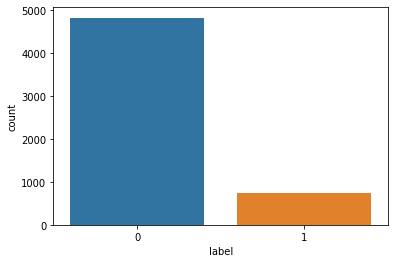

In [96]:
sns.countplot(data['label'])
plt.savefig("imgs/dist")
plt.show()

Charts like this can be logged as well using the log_image function as shown below:

In [48]:
neptune.log_image('target_dist', 'imgs/dist.png') # log the image

In the experiments dashboard, click on the logs to see all savaed logged. So far you have a text and an image. 

<img src='img3.png'/>

Clicking on the target_dist, displays our saved image


<img src='img4.png'/>

Convert labels numerical format

In [56]:
data['label'] = data['label'].map( {'spam': 1, 'ham': 0} )
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
data_ham  = data[data['label'] == 0].copy()
data_spam = data[data['label'] == 1].copy()

data_ham.to_csv("outputs/data_ham.csv")
data_spam.to_csv("outputs/data_spam.csv")

Log artifact such as dataset

In [63]:
neptune.log_artifact("outputs/data_ham.csv")
neptune.log_artifact("outputs/data_spam.csv")

<img src='img5.png'/>

WordClouds

In [98]:
def show_wordcloud(df, title):
    text = ' '.join(df['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.savefig(f"imgs/{title}.png")
    plt.show()
    neptune.log_image(title, f'imgs/{title}.png') # log the image

### WordCloud: Ham messages

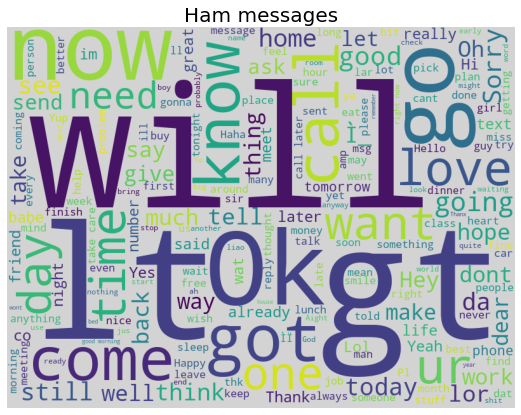

In [65]:
show_wordcloud(data_ham, "Ham messages")

### WordCloud: Spam messages

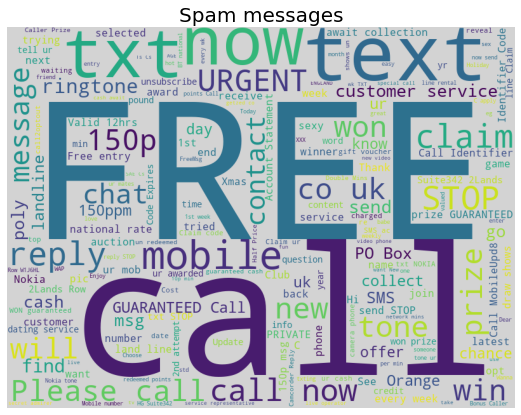

In [66]:
show_wordcloud(data_spam, "Spam messages")

Notice that majority of the word in Spam messages contains terms like FREE, CALL, URGENT. These terms will serve as important features to our model. 

Our log in neptune: TODO: MAKE A Video or GIF or Image


<img src='imgs/img6.png' />

In [70]:
from sklearn.model_selection import train_test_split

X = data['text'].values
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##Save important properties
neptune.set_property('test_split_percent', 0.20)
neptune.set_property('data_split_random_state', 42)

In [71]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

## FEATURE ENGINEERING AND PROCESSING

In [72]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)

# integer encode the documents
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)

vocab_size = len(t.word_index) + 1

print(encoded_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


In [73]:
# pad documents to a max length of 4 words
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

print(padded_train)

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]


Create a new experiment to track model training

In [79]:
# parameters
PARAMS = {'vocab_size':vocab_size,
          'max_length': max_length,
          'epochs': 20,
          'batch_size': 64,
          'input_size': 24,
          'metric': 'accuracy',
          'loss': 'binary_crossentropy',
          'optimizer': 'rmsprop',
          'dropout': 0.5}

#create first model experiment 
neptune.create_experiment(name='training_model_exp1', params=PARAMS)

## NOTE TO NETUNE: I SHOULD BE ABLE TO UPDATE MY TRAINING PARAMETERS

psutil is not installed. You will not be able to abort this experiment from the UI.
psutil is not installed. Hardware metrics will not be collected.


https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-4


Experiment(SPAM-4)

In [80]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, PARAMS['input_size'], input_length=max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(PARAMS['dropout']))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer=PARAMS['optimizer'], loss=PARAMS['loss'], metrics=[PARAMS['metric']])

# summarize the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 8, 24)             190920    
_________________________________________________________________
flatten_2 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               96500     
_________________________________________________________________
dense_9 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [81]:
# fit the model
model.fit(x=padded_train, 
          y=y_train, 
          epochs=PARAMS['epochs'],
          batch_size=PARAMS['batch_size'],
          validation_data=(padded_test, y_test), verbose=1,
          callbacks=[NeptuneMonitor()]
          )

Epoch 1/20
70/70 [==============================] - 1s 20ms/step - loss: 0.2211 - accuracy: 0.9107 - val_loss: 0.0885 - val_accuracy: 0.9830
Epoch 2/20
70/70 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0774 - val_accuracy: 0.9839
Epoch 3/20
70/70 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9975 - val_loss: 0.0955 - val_accuracy: 0.9839
Epoch 4/20
70/70 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.1413 - val_accuracy: 0.9839
Epoch 5/20
70/70 [==============================] - 0s 4ms/step - loss: 4.6716e-04 - accuracy: 0.9998 - val_loss: 0.1769 - val_accuracy: 0.9821
Epoch 6/20
70/70 [==============================] - 0s 4ms/step - loss: 6.5981e-06 - accuracy: 1.0000 - val_loss: 0.2185 - val_accuracy: 0.9821
Epoch 7/20
70/70 [==============================] - 0s 4ms/step - loss: 1.1937e-06 - accuracy: 1.0000 - val_loss: 0.2643 - val_accuracy: 0.9812
Epoch 8

Navigate to the experiment page to see live training logs and metrics and charts

<img src='imgs/modelt1.png' />

<img src='imgs/modelt2.png' />


ADD SHORT VIDEO

In [82]:
# evaluate the model
loss, accuracy = model.evaluate(padded_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

neptune.log_metric('Test Accuracy', accuracy)
neptune.log_metric('Test Loss', loss)

Accuracy: 98.116595


In [88]:
preds = (model.predict(padded_test) > 0.5).astype("int32")
pd.Series(preds.flatten()).to_csv("outputs/test_predictions.csv", index=False)
neptune.log_artifact("test_predictions.csv") #log predictions

In [91]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("imgs/cf.png")
    neptune.log_image("confusion_matrix", "imgs/cf.png")

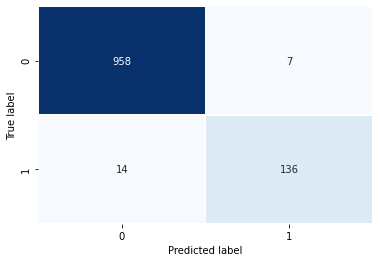

In [92]:
plot_confusion_matrix(y_test, preds)

## SAVING MODEL AND TOKENIZER

In [94]:
model.save("spam_model_exp1")
neptune.log_artifact("spam_model_exp1")

INFO:tensorflow:Assets written to: spam_model_exp1/assets


VIEW IN DASHBOARD

<img src='imgs/modelout.png' />

See this in Neptune [LINK](https://ui.neptune.ai/risingodegua/spam-classifier/e/SPAM-4/artifacts) 

|source code| |[open in colab](https://colab.research.google.com/drive/1YL9CTs9OWwi1jvFf9TZNYG7-vLk6jZsG?usp=sharing)|


Troubleshooting
---------------------

Problems that we know off

Other integrations you may like
------------------------------------------

List of similar integrations
